In [1]:
import pandas as pd 
import numpy as np

# Data exploration and Data cleaning

In [2]:
df = pd.read_csv('C:\\Users\\Abhishek\\Downloads\\train.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
df.isnull().sum() 

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [4]:
df['salary']=df['salary'].fillna(0)
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

# Label Encoding for the conversion of text values into numerical values

In [6]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

In [7]:
dfle = df
dfle.ssc_b = Le.fit_transform(dfle.ssc_b)
dfle.hsc_b = Le.fit_transform(dfle.hsc_b)
dfle.hsc_s = Le.fit_transform(dfle.hsc_s)
dfle.degree_t = Le.fit_transform(dfle.degree_t)
dfle.workex = Le.fit_transform(dfle.workex)
dfle.specialisation = Le.fit_transform(dfle.specialisation)
dfle.status = Le.fit_transform(dfle.status)

dfle.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,0,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,0,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,0,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,5,0,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


# Training and testing split

In [8]:
finaldf = dfle.drop(['ssc_b','hsc_b','salary','sl_no','gender'], axis = 'columns')
finaldf.head()

,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,67.00,91.00,1,58.00,2,0,55.0,1,58.80,1
1,79.33,78.33,2,77.48,2,1,86.5,0,66.28,1
2,65.00,68.00,0,64.00,0,0,75.0,0,57.80,1
3,56.00,52.00,2,52.00,2,0,66.0,1,59.43,0
4,85.80,73.60,1,73.30,0,0,96.8,0,55.50,1


In [9]:
X = finaldf.drop(['status'],axis = 'columns')

In [10]:
y = finaldf.status

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.80, random_state = 10 )

# GridsearchCV for knowing the performance of the different models 

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC

def find_best_model_using_gridsearchcv(X,y):
    algos = {

        'SVC':{
            'model': SVC(),
            'params':{
                'C':[1,20],
                'kernel': ['linear']
            }
        },

        'random_forest':{
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators':[1,5]
            }
        },
        'decision_tree_classifier':{
            'model': tree.DecisionTreeClassifier(),
            'params': {
            'criterion': ['gini', 'entropy'],
            'splitter': ['best']
            }
        }
    }
    
    scores=[]
    cv = ShuffleSplit(n_splits = 5, test_size=0.20, random_state = 0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score = False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
        
    return pd.DataFrame(scores,columns = ['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,SVC,0.851163,"{'C': 20, 'kernel': 'linear'}"
1,random_forest,0.795349,{'n_estimators': 1}
2,decision_tree_classifier,0.804651,"{'criterion': 'entropy', 'splitter': 'best'}"


In [15]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'SVC':{
            'model': SVC(),
            'params':{
                'C':[1,10,20],
                'kernel': ['rbf', 'linear']
            }
        },

        'random_forest':{
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators':[1,5,10]
            }
        },
        'decision_tree_classifier':{
            'model': tree.DecisionTreeClassifier(),
            'params': {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'splitter': ['best', 'random']
            }
        
        }
    }
    
    scores=[]
    cv = ShuffleSplit(n_splits = 5, test_size=0.20, random_state = 0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score = False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
        
    return pd.DataFrame(scores,columns = ['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 348, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to n

,model,best_score,best_params
0,SVC,0.855814,"{'C': 10, 'kernel': 'linear'}"
1,random_forest,0.841860,{'n_estimators': 10}
2,decision_tree_classifier,0.813953,"{'criterion': 'entropy', 'splitter': 'best'}"


# Cross validation scores for the highest accuracy obtained model

In [16]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size=0.20, random_state = 10)

cross_val_score(SVC(), X,y, cv = cv)

array([0.8372093 , 0.88372093, 0.86046512, 0.88372093, 0.88372093])

# Training the model, getting training and testing scores

In [15]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=20)
svm.fit(X_train, y_train)

SVC(C=20, kernel='linear')

In [16]:
svm.score(X_train, y_train)

0.9127906976744186

In [17]:
svm.score(X_test, y_test)


0.7906976744186046

# Visualizing predictions with confusion matrix

In [18]:
y_predicted = svm.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[12,  6],
       [ 3, 22]], dtype=int64)

Text(33.0, 0.5, 'truth')

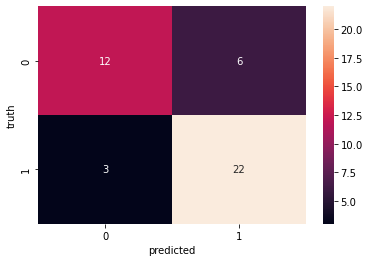

In [20]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure
sn.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

# Saving the model for the deployement

In [21]:
import pickle
with open('Placementinternship.pickle','wb') as f:
    pickle.dump(svm,f)

In [22]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))